In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Installing dependencies and dataset**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
import tensorflow_datasets as tfds # datasets 

from matplotlib import pyplot as plt # for visualization

In [3]:
# loading data from tensorflow api
df = tfds.load('fashion_mnist',split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.3FCV9Q_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.3FCV9Q_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
df.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

# **Vizualize data and build dataset**

In [5]:
import numpy as np 

In [6]:
# setup data iterator
dataiterator = df.as_numpy_iterator()

In [7]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

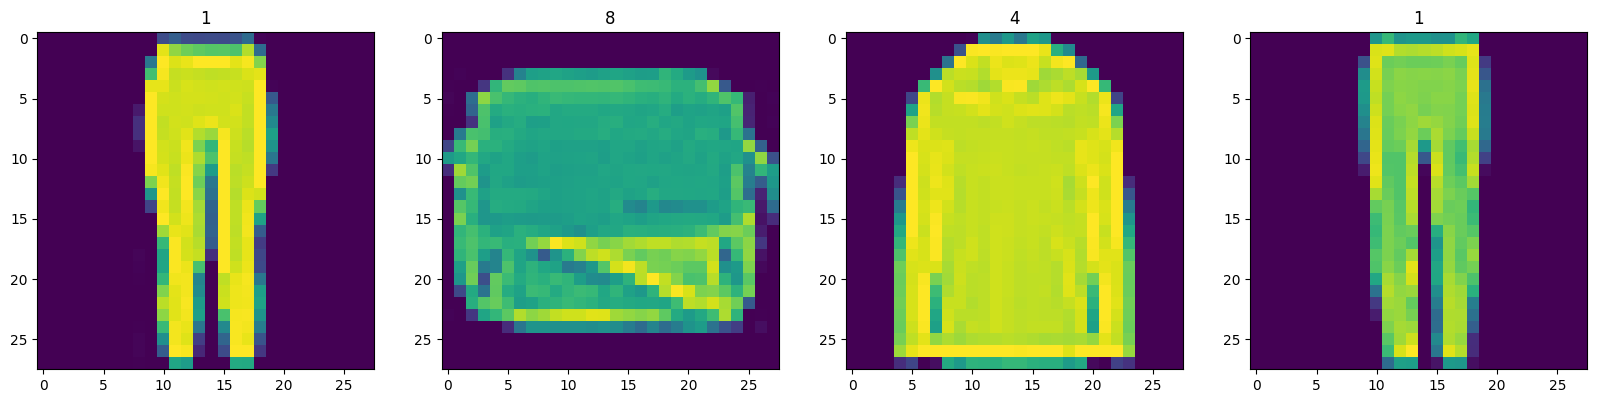

In [8]:
#setup the subplot formating

fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx in range(4):
    #take an image and label
    sample = dataiterator.next()
    #plot image using subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    #image label
    ax[idx].title.set_text(sample['label'])

In [9]:
#scaling images

def scale_images(data):
    image = data['image']
    return image/255

In [10]:
#Reload the dataset
ds = tfds.load('fashion_mnist',split = 'train')
#scaling the images
ds = ds.map(scale_images)
#cache the dataset for that batch
ds = ds.cache()
# shuffle the dataset
ds = ds.shuffle(60000)
#batch into 128 images per sample
ds = ds.batch(128)
# reducing the likelihood of bottlenecking
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# **Building Neural Network**

**Importing Modeling Component**

In [12]:
#Bring the sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
#Bring in the layers for neural network
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

**Build Generator**

In [13]:
def build_generator():
    model = Sequential()

    #takes in random values and reshapes it in 7*7*128
    model.add(Dense(7*7*128,input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    #upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))

    #Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))

    #Convulation block 1
    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    #Convolutional block 2
    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    #Conv layer to get to one channel
    model.add(Conv2D(1,4,padding = 'same',activation = 'sigmoid'))

    return model

In [14]:
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
img = generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [17]:
img.shape

(4, 28, 28, 1)

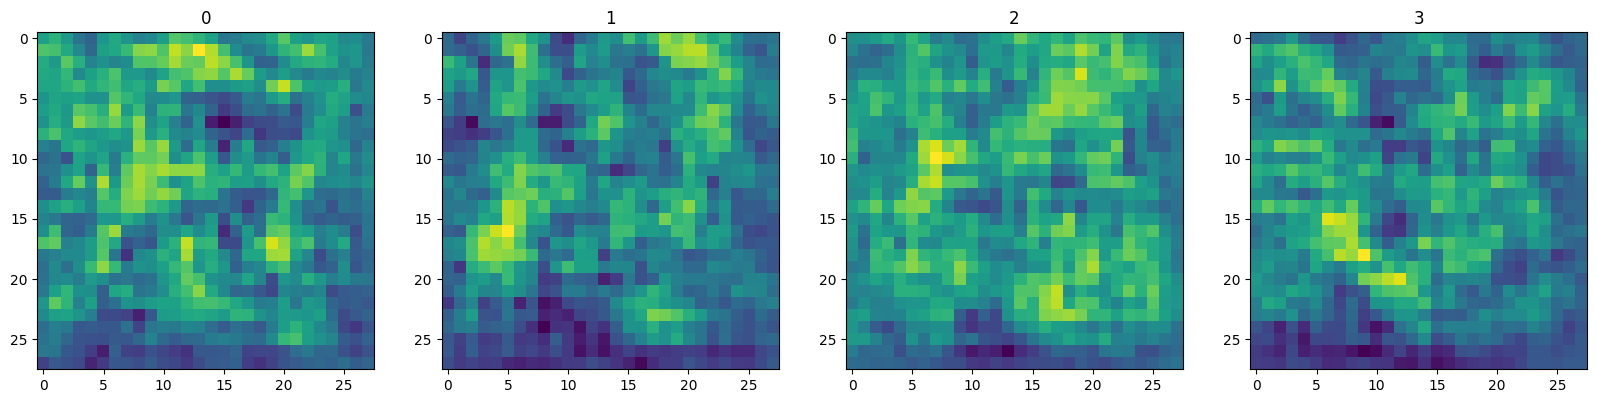

In [18]:
#subplot formatting
fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
#loop four times and get img
for idx,img in enumerate(img):
    #plot the image 
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

**Build Network**

In [19]:
def build_discriminator():
    model = Sequential()

    #first conv block
    model.add(Conv2D(32,5,input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #second conv block 
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #third conv block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #fourth conv block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Flatten then to pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation = 'sigmoid'))

    return model;

In [20]:
discriminator = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(4, 28, 28, 1)

In [23]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


array([[0.49981898],
       [0.49995685],
       [0.49975348],
       [0.49982613]], dtype=float32)

# **Build Custom Training Loop**

**Setup losses and optimizers**

In [24]:
# optimizer for both generator and discriminator
from tensorflow.keras.optimizers import Adam
#loss for both generator and discriminator
from tensorflow.keras.losses import BinaryCrossentropy

In [25]:
gen_opt = Adam(learning_rate = 0.0001)
dis_opt = Adam(learning_rate = 0.00001)
gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

**Build Subclassed Model**

In [26]:
#importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [27]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        super().__init__(*args,**kwargs)

        #create attributes of gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self,gen_opt,dis_opt,gen_loss,dis_loss,*args,**kwargs):
        #compile with base class
        super().compile(*args,**kwargs)

        #create attributes of loss and opt
        self.gen_loss = gen_loss
        self.gen_opt = gen_opt
        self.dis_loss = dis_loss
        self.dis_opt = dis_opt

    def train_step(self,batch):
        #getting data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1))),

        #Train discriminator
        with tf.GradientTape() as d_tape:
            #pass real and fake images to disc model
            yhat_real = self.discriminator(real_images,training = True)
            yhat_fake = self.discriminator(fake_images,training = True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis = 0)

            #Create label for real and fake images 
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis = 0)

            #Add some noise to the True outputs
            noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake],axis = 0)

            #calculate binarycross entropy loss
            total_dis_loss = self.dis_loss(y_realfake,yhat_realfake)

        #apply backprop
        dis_grad = d_tape.gradient(total_dis_loss,self.discriminator.trainable_variables)
        self.dis_opt.apply_gradients(zip(dis_grad,self.discriminator.trainable_variables))

        #Training Generator
        with tf.GradientTape() as g_tape:
            #Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)),training = True)

            #create the predicted label
            predicted_labels = self.discriminator(gen_images,training = False)

            #calculate loss - fake out the discriminator
            yhat_gen = predicted_labels
            y_gen = tf.zeros_like(yhat_gen)

            total_gen_loss = self.gen_loss(y_gen,yhat_gen)

        #apply backprop
        gen_grad = g_tape.gradient(total_gen_loss,self.generator.trainable_variables)
        self.gen_opt.apply_gradients(zip(gen_grad,self.generator.trainable_variables))

        return {"dis_loss": total_dis_loss, "gen_loss" : total_gen_loss}

In [28]:
#create instance of subclassed model
fashgan = FashionGAN(generator,discriminator)

In [29]:
#compile the model
fashgan.compile(gen_opt,dis_opt,gen_loss,dis_loss)

**Build Callback**

In [30]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

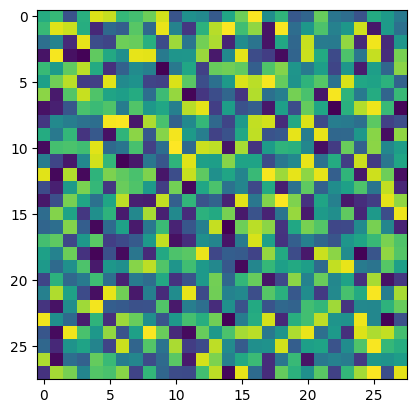

In [31]:
# Creating a random image array
random_image = np.random.rand(28, 28, 1) * 255  # Scale values to 0-255

# Convert NumPy array to image
image = array_to_img(random_image)
plt.imshow(image)

In [32]:
class ModelMonitor(Callback):
    def __init__(self,num_img = 3,latent_dim = 128,save_dir="/kaggle/working/"):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self,epoch,logs = None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            file_path = os.path.join(self.save_dir, f'generated_img_{epoch}_{i}.png')
            img.save(file_path)

**Train**

In [33]:
#Training (2000 epochs will be good)
hist = fashgan.fit(ds,epochs = 20,callbacks = [ModelMonitor()])


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 220ms/step - dis_loss: 0.4431 - gen_loss: 1.3431
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 215ms/step - dis_loss: 0.6208 - gen_loss: 1.7032
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6856 - gen_loss: 0.6815
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6894 - gen_loss: 0.6473
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6893 - gen_loss: 0.6674
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6795 - gen_loss: 0.6801
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6245 - gen_loss: 0.6372
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6900 - gen_loss: 0.4824
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6940 - gen_loss: 0.6229
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - dis_loss: 0.6814 - gen_loss: 0.6454
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 217ms/step - 

**Review Performance**

In [34]:
hist.history

{'dis_loss': [1.1799864768981934,
  0.6554871797561646,
  0.7167980074882507,
  0.6691405177116394,
  0.7115732431411743,
  0.6825493574142456,
  0.5480960011482239,
  0.7167227864265442,
  0.7630243897438049,
  0.5829560160636902,
  0.6804958581924438,
  0.5667257905006409,
  0.6296722292900085,
  0.5269988179206848,
  0.3126808702945709,
  0.29567453265190125,
  0.2833569049835205,
  0.27939513325691223,
  0.2698041498661041,
  0.2738697826862335],
 'gen_loss': [0.44684338569641113,
  0.8199013471603394,
  0.5969794988632202,
  0.6313406229019165,
  0.6213406920433044,
  0.724018931388855,
  0.47664499282836914,
  0.5738527774810791,
  0.645539402961731,
  0.6568700075149536,
  0.5333402156829834,
  0.6260161399841309,
  0.6159733533859253,
  0.05264704301953316,
  0.022209852933883667,
  0.02234211191534996,
  0.02470722235739231,
  0.028648335486650467,
  0.03191233426332474,
  0.031518906354904175]}

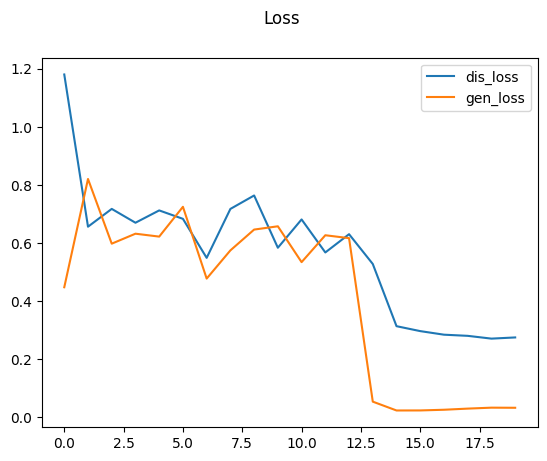

In [35]:
plt.suptitle('Loss')
plt.plot(hist.history['dis_loss'],label = 'dis_loss')
plt.plot(hist.history['gen_loss'],label = 'gen_loss')
plt.legend()
plt.show()

# **Testing the Generator**

**Generate Images**

In [36]:
print(tf.__version__)  # Check if it's 2.9+ (latest)

2.17.1


In [37]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


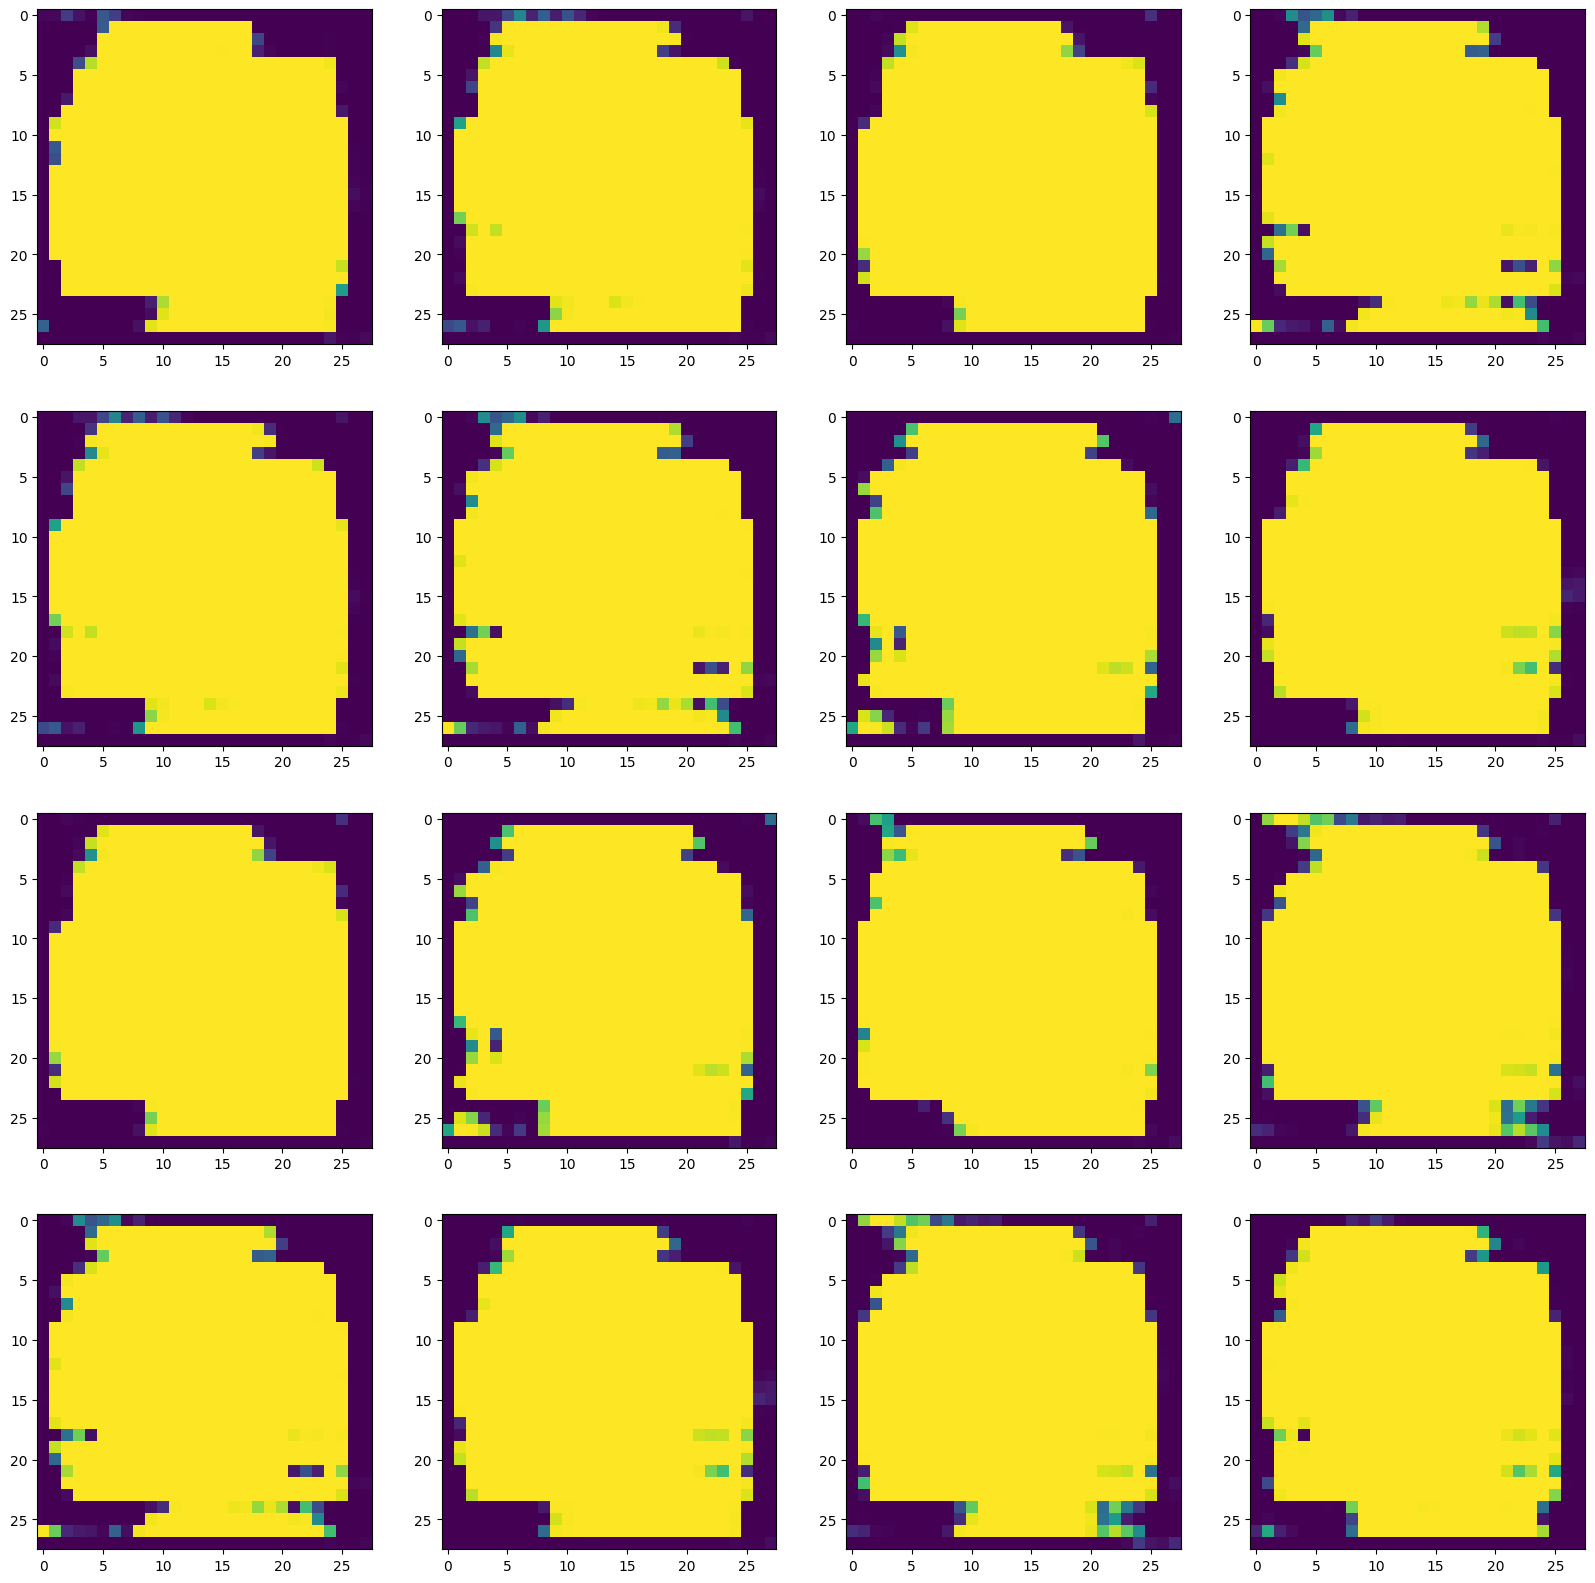

In [38]:
fig,ax = plt.subplots(ncols = 4,nrows = 4,figsize = (20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])